# チーム成績使って遊んでみる

## ライブラリの読み込み

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import statsmodels.api as sm

## データ取得

In [2]:
df = pd.read_csv('new_team_batting_14_23.csv')

# 先頭数行確認
df.head(10)

,チーム,打率,試合,打席,打数,得点,安打,二塁打,三塁打,本塁打,...,犠打,犠飛,四球,故意四,死球,三振,併殺打,長打率,出塁率,年度
0,オリックス,0.250,143,5324,4782,508,1194,211,17,109,...,83,25,371,8,63,986,106,0.369,0.311,2023
1,ソフトバンク,0.248,143,5454,4786,536,1185,195,15,104,...,107,38,470,14,53,1053,88,0.360,0.319,2023
2,楽天,0.244,143,5369,4667,513,1140,168,25,104,...,125,33,490,9,52,937,108,0.358,0.321,2023
3,ロッテ,0.239,143,5414,4744,505,1135,220,12,100,...,116,39,453,20,62,1011,79,0.354,0.311,2023
4,西武,0.233,143,5222,4672,435,1088,188,21,90,...,90,28,387,9,45,1045,97,0.340,0.296,2023
5,日本ハム,0.231,143,5248,4688,464,1082,195,18,100,...,84,25,397,10,54,1111,78,0.344,0.297,2023
6,巨人,0.252,143,5352,4826,523,1218,204,14,164,...,93,31,365,38,37,1111,94,0.402,0.308,2023
7,DeNA,0.247,143,5331,4783,520,1182,230,18,105,...,106,31,355,22,56,846,103,0.369,0.305,2023
8,阪神,0.247,143,5479,4775,555,1180,179,34,84,...,106,47,494,35,57,1173,92,0.352,0.322,2023
9,広島,0.246,143,5241,4728,493,1165,197,18,96,...,96,20,349,25,48,1032,115,0.357,0.304,2023


## 変数名確認

In [3]:
df.columns

Index(['チーム', '打率', '試合', '打席', '打数', '得点', '安打', '二塁打', '三塁打', '本塁打', '塁打',
       '打点', '盗塁', '盗塁刺', '犠打', '犠飛', '四球', '故意四', '死球', '三振', '併殺打', '長打率',
       '出塁率', '年度'],
      dtype='object')

## 要約統計量算出

In [4]:
df.describe()

,打率,試合,打席,打数,得点,安打,二塁打,三塁打,本塁打,塁打,...,犠打,犠飛,四球,故意四,死球,三振,併殺打,長打率,出塁率,年度
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.251017,140.800000,5320.900000,4697.683333,554.050000,1179.850000,203.258333,21.300000,117.333333,1777.708333,...,102.633333,30.233333,440.933333,16.766667,49.250000,1020.041667,95.966667,0.378275,0.319875,2018.500000
std,0.010391,6.968838,290.064768,256.780912,72.770602,90.213253,21.671922,6.512561,30.172427,163.582652,...,24.661723,6.810439,62.001997,8.685672,11.766103,90.002651,12.618469,0.025603,0.013187,2.884324
min,0.229000,120.000000,4437.000000,3840.000000,390.000000,902.000000,152.000000,7.000000,62.000000,1365.000000,...,48.000000,15.000000,306.000000,2.000000,22.000000,811.000000,50.000000,0.326000,0.285000,2014.000000
25%,0.244750,143.000000,5305.500000,4704.750000,505.750000,1145.250000,188.750000,17.000000,94.750000,1676.750000,...,85.750000,26.000000,399.750000,10.000000,42.750000,956.000000,86.750000,0.359500,0.310750,2016.000000
50%,0.250500,143.000000,5386.000000,4775.000000,550.000000,1190.000000,205.000000,20.500000,111.500000,1773.000000,...,102.500000,30.000000,442.000000,15.500000,48.000000,1022.000000,95.000000,0.377500,0.320000,2018.500000
75%,0.257000,143.000000,5469.000000,4826.500000,594.500000,1232.250000,217.000000,26.000000,135.250000,1873.750000,...,115.000000,34.000000,484.000000,22.250000,56.250000,1084.500000,105.000000,0.396250,0.329000,2021.000000
max,0.280000,144.000000,5663.000000,5023.000000,792.000000,1401.000000,260.000000,39.000000,202.000000,2241.000000,...,178.000000,47.000000,599.000000,40.000000,87.000000,1234.000000,129.000000,0.454000,0.352000,2023.000000


## 興味のある変数を取り出して相関係数を算出

In [5]:
selected = df[['打率', '得点', '犠打', '出塁率', '長打率', '併殺打', '盗塁', '三振']]
selected.corr()

,打率,得点,犠打,出塁率,長打率,併殺打,盗塁,三振
打率,1.000000,0.733783,0.178846,0.775797,0.704033,0.150300,0.147417,-0.152642
得点,0.733783,1.000000,0.054809,0.785257,0.826041,0.097611,0.305994,0.263279
犠打,0.178846,0.054809,1.000000,0.122307,-0.178494,0.008305,0.213292,-0.039227
出塁率,0.775797,0.785257,0.122307,1.000000,0.655911,0.081279,0.299944,-0.046370
長打率,0.704033,0.826041,-0.178494,0.655911,1.000000,-0.070616,0.124172,0.151975
併殺打,0.150300,0.097611,0.008305,0.081279,-0.070616,1.000000,-0.379595,-0.068909
盗塁,0.147417,0.305994,0.213292,0.299944,0.124172,-0.379595,1.000000,0.072192
三振,-0.152642,0.263279,-0.039227,-0.046370,0.151975,-0.068909,0.072192,1.000000


## 相関行列を見て思いついた疑問点
* 犠打は併殺を防ぐことに貢献しているのか？
* 犠打と盗塁の相関係数が正なのは変じゃないか？
* 三振と得点との間の相関係数が微妙に高いのはなぜか？

### 打率、長打率、出塁率などの指標は、回帰係数の解釈が難しいので代わりの指標を用意する

1. 打率→安打数
2. 長打率→二塁打と三塁打と本塁打の合計
3. 出塁率→安打、四球、死球、故意四球の合計

In [6]:
df_without_rate = df[['チーム', '打席', '打数', '得点', '安打', '二塁打', '三塁打', '本塁打', '塁打',
       '打点', '盗塁', '盗塁刺', '犠打', '犠飛', '四球', '故意四', '死球', '三振', '併殺打']].copy()
df_without_rate.head(6)

,チーム,打席,打数,得点,安打,二塁打,三塁打,本塁打,塁打,打点,盗塁,盗塁刺,犠打,犠飛,四球,故意四,死球,三振,併殺打
0,オリックス,5324,4782,508,1194,211,17,109,1766,482,52,32,83,25,371,8,63,986,106
1,ソフトバンク,5454,4786,536,1185,195,15,104,1722,513,73,30,107,38,470,14,53,1053,88
2,楽天,5369,4667,513,1140,168,25,104,1670,485,102,38,125,33,490,9,52,937,108
3,ロッテ,5414,4744,505,1135,220,12,100,1679,475,73,21,116,39,453,20,62,1011,79
4,西武,5222,4672,435,1088,188,21,90,1588,414,80,38,90,28,387,9,45,1045,97
5,日本ハム,5248,4688,464,1082,195,18,100,1613,443,75,49,84,25,397,10,54,1111,78


メモ：元のデータから特定の変数を抽出して新しいデータフレームを作るときは、copyメソッドを使うべし

## 長打数と出塁数を作成

In [7]:
df_without_rate['長打数'] = df_without_rate['二塁打'] + df_without_rate['三塁打'] + df_without_rate['本塁打']
df_without_rate['出塁数'] = df_without_rate['安打'] + df_without_rate['四球'] + df_without_rate['故意四'] + df_without_rate['死球']
df_without_rate.head(6) 

,チーム,打席,打数,得点,安打,二塁打,三塁打,本塁打,塁打,打点,...,盗塁刺,犠打,犠飛,四球,故意四,死球,三振,併殺打,長打数,出塁数
0,オリックス,5324,4782,508,1194,211,17,109,1766,482,...,32,83,25,371,8,63,986,106,337,1636
1,ソフトバンク,5454,4786,536,1185,195,15,104,1722,513,...,30,107,38,470,14,53,1053,88,314,1722
2,楽天,5369,4667,513,1140,168,25,104,1670,485,...,38,125,33,490,9,52,937,108,297,1691
3,ロッテ,5414,4744,505,1135,220,12,100,1679,475,...,21,116,39,453,20,62,1011,79,332,1670
4,西武,5222,4672,435,1088,188,21,90,1588,414,...,38,90,28,387,9,45,1045,97,299,1529
5,日本ハム,5248,4688,464,1082,195,18,100,1613,443,...,49,84,25,397,10,54,1111,78,313,1543


In [8]:
df_without_rate[['得点', '安打', '二塁打', '三塁打', '本塁打', '塁打',
       '打点', '盗塁', '盗塁刺', '犠打', '犠飛', '四球', '故意四', '死球', '三振', '併殺打']].corr()

,得点,安打,二塁打,三塁打,本塁打,塁打,打点,盗塁,盗塁刺,犠打,犠飛,四球,故意四,死球,三振,併殺打
得点,1.000000,0.711727,0.518827,0.230885,0.717162,0.876462,0.997080,0.305994,0.102777,0.054809,0.334500,0.628738,0.092367,0.122155,0.263279,0.097611
安打,0.711727,1.000000,0.625144,0.218529,0.354929,0.848103,0.703647,0.129605,0.102822,0.337860,0.300211,0.280991,0.010347,0.110111,0.217366,0.336166
二塁打,0.518827,0.625144,1.000000,0.036718,0.293570,0.642608,0.520248,-0.065433,-0.064245,0.073164,0.206946,0.180031,0.066975,0.110078,0.215588,0.188524
三塁打,0.230885,0.218529,0.036718,1.000000,-0.058931,0.172395,0.220703,0.249272,0.289693,0.207098,0.321255,0.147538,-0.046588,0.156273,0.068651,-0.221469
本塁打,0.717162,0.354929,0.293570,-0.058931,1.000000,0.783281,0.735753,0.090915,0.010821,-0.255977,-0.039559,0.316683,0.259967,-0.059792,0.384639,-0.049610
塁打,0.876462,0.848103,0.642608,0.172395,0.783281,1.000000,0.881671,0.132962,0.077247,0.070865,0.196668,0.365795,0.154720,0.054666,0.366739,0.165281
打点,0.997080,0.703647,0.520248,0.220703,0.735753,0.881671,1.000000,0.282539,0.093617,0.035996,0.318990,0.618171,0.119870,0.119216,0.263572,0.105099
盗塁,0.305994,0.129605,-0.065433,0.249272,0.090915,0.132962,0.282539,1.000000,0.577145,0.213292,0.388537,0.324625,-0.146045,0.227986,0.072192,-0.379595
盗塁刺,0.102777,0.102822,-0.064245,0.289693,0.010821,0.077247,0.093617,0.577145,1.000000,0.218736,0.171212,0.118502,-0.043038,0.291170,0.061973,-0.338031
犠打,0.054809,0.337860,0.073164,0.207098,-0.255977,0.070865,0.035996,0.213292,0.218736,1.000000,0.141906,0.104353,-0.226215,0.238079,-0.039227,0.008305


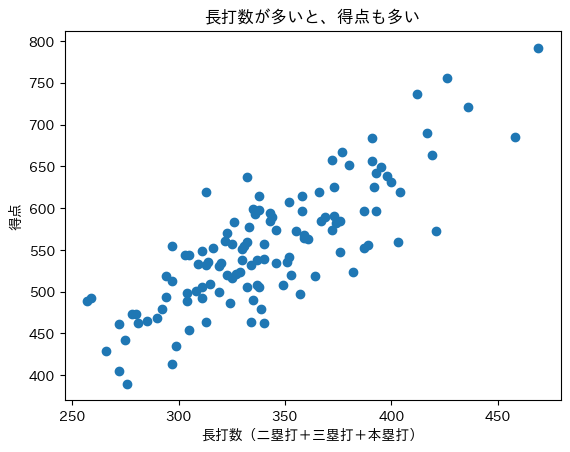

In [9]:
plt.scatter(df_without_rate['長打数'], df_without_rate['得点'])
plt.xlabel('長打数（二塁打＋三塁打＋本塁打）')
plt.ylabel('得点')
plt.title('長打数が多いと、得点も多い')
plt.show()

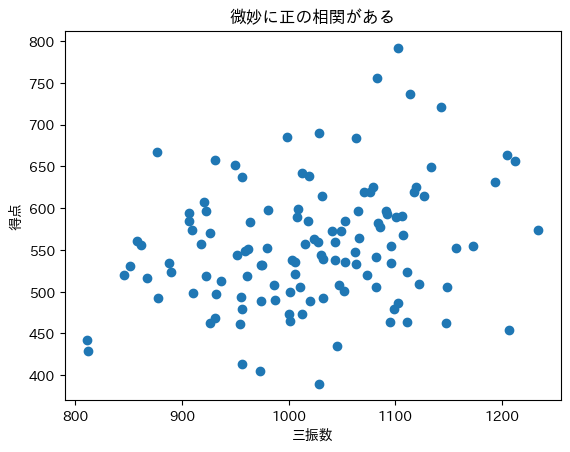

In [10]:
plt.scatter(df_without_rate['三振'], df_without_rate['得点'])
plt.xlabel('三振数')
plt.ylabel('得点')
plt.title('微妙に正の相関がある')
plt.show()

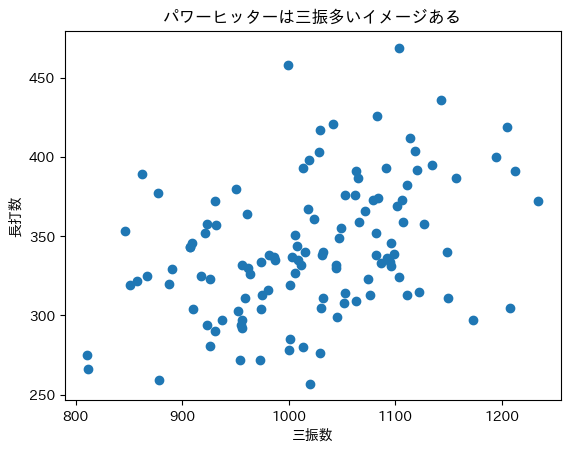

In [11]:
plt.scatter(df_without_rate['三振'], df_without_rate['長打数'])
plt.xlabel('三振数')
plt.ylabel('長打数')
plt.title('パワーヒッターは三振多いイメージある')
plt.show()

## 予想：長打数で調整すれば、三振と得点の間に負の相関が生まれるのでは？
### 想定している因果ダイアグラム：三振←長打数→得点
### 方法
1. 三振と得点をそれぞれ長打数で予測する回帰式を作成
2. 残差同士の相関係数を算出する（偏相関係数）

In [13]:
struckout = df_without_rate['三振']
score = df_without_rate['得点']
slugging = df_without_rate['長打数']
slugging = sm.add_constant(slugging)

# モデル作成
struckout_slugging = sm.OLS(struckout, slugging)
struckout_result = struckout_slugging.fit()

score_slugging = sm.OLS(score, slugging)
score_result = score_slugging.fit()


In [14]:
struckout_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     三振   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     21.80
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           8.06e-06
Time:                        22:36:32   Log-Likelihood:                -699.58
No. Observations:                 120   AIC:                             1403.
Df Residuals:                     118   BIC:                             1409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        733.1090     61.916     11.840      0.000     610.498     855.720
長打数            0.8393      0.180      4.669      0.000       0.483       1.195
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.142
Skew:                          -0.046   Prob(JB):                        0.931
Kurtosis:                       2.858   Cond. No.                     2.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
score_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     得点   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     228.3
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           2.33e-29
Time:                        22:37:53   Log-Likelihood:                -619.65
No. Observations:                 120   AIC:                             1243.
Df Residuals:                     118   BIC:                             1249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.0659     31.809      2.423      0.017      14.076     140.056
長打数            1.3951      0.092     15.109      0.000       1.212       1.578
==============================================================================
Omnibus:                        0.611   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.733
Skew:                          -0.075   Prob(JB):                        0.693
Kurtosis:                       2.648   Cond. No.                     2.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

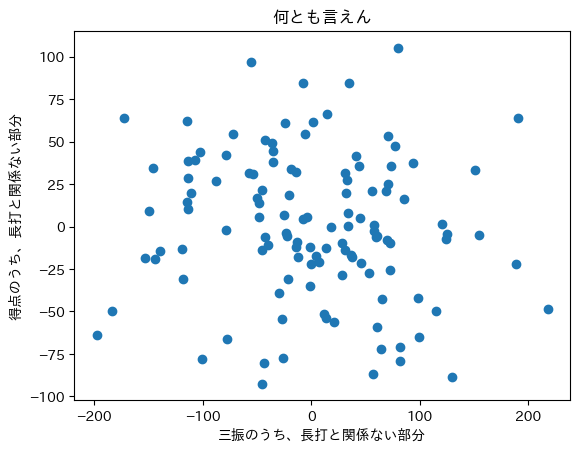

In [19]:
# 誤差項を取り出す
res_struckout = struckout_result.resid
res_score = score_result.resid

# 散布図
plt.scatter(res_struckout, res_score)
plt.xlabel('三振のうち、長打と関係ない部分')
plt.ylabel('得点のうち、長打と関係ない部分')
plt.title('何とも言えん')
plt.show()

## 偏相関係数を算出

In [32]:
df_res = pd.concat([res_score, res_struckout], axis=1)
df_res

,0,1
0,-39.225478,-29.936334
1,20.862561,56.366420
2,21.579808,-45.366326
3,-35.249818,-0.740083
4,-59.210456,60.955173
...,...,...
115,20.856856,69.387154
116,54.564786,-5.257834
117,42.306372,-78.186832
118,19.476746,-110.560589


In [33]:
df_res.corr()

,0,1
0,1.000000,-0.106959
1,-0.106959,1.000000


## 確かに負の相関になった